In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path
from os import path
import math
import heartpy as hp

In [141]:
PARTICIPANT = "participant_7"

## Log Reg

## RF

## SVM

## NN if needed

In [152]:
###########################
## Load or Compile Files ##
###########################

if path.exists("data/saved/" + PARTICIPANT):
    print("file data already extracted, opening...")
    data = pd.read_pickle("data/saved/" + PARTICIPANT)
    print("successfully opened")
    pass
else:
    print("compiling individual data files...")
    individual_dfs = []
    for f in os.listdir("data/raw/" + PARTICIPANT):
        small_df = pd.read_csv("data/raw/"+ PARTICIPANT + "/" + f, header=0)
        individual_dfs.append(small_df)

    data = pd.concat(individual_dfs, axis=0)
    data["time"] = data['year'].astype(str) + "-" + data['month'].astype(str) + "-" + data['day'].astype(str) + " " + data['hour'].astype(str) + "-" + data['minute'].astype(str) + "-" + data['second'].astype(str)
    data = data.drop(["id", "year", "month", "day", "hour", "minute", "second"], axis=1)
    data = data.set_index("time")
    data = data.sort_index()
    data.to_pickle("data/saved/" + PARTICIPANT)
    print("combined files saved")

print("\n *** DATA PREVIEW ***")
print(data.head())

file data already extracted, opening...
successfully opened

 *** DATA PREVIEW ***
                       ir   bpm  pump_on  vacuum_on   temp     x     y     z
time                                                                        
2022-3-2 9-10-0  212290.0  2.95      0.0        0.0  24.33 -8.44 -3.88  2.25
2022-3-2 9-10-0  212231.0  2.95      0.0        0.0  24.44 -8.25 -3.92  2.28
2022-3-2 9-10-0  211661.0  2.95      0.0        0.0  24.64 -8.34 -3.93  2.55
2022-3-2 9-10-0  211580.0  2.95      0.0        0.0  24.64 -8.26 -3.96  2.33
2022-3-2 9-10-0  211499.0  2.95      0.0        0.0  24.33 -8.35 -3.82  2.14


In [177]:
###################
## Preprocessing ##
###################

filtered_bvp = hp.filter_signal(data["ir"], cutoff = 0.75, sample_rate = 100.0)
## add this column and remove ir
## add the label smoothing because you keep forgetting

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


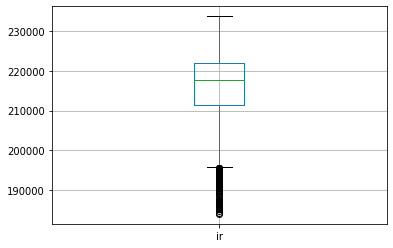

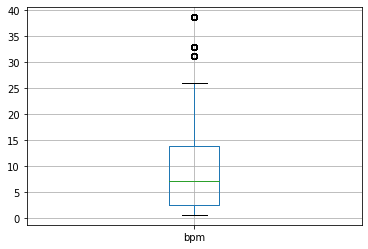

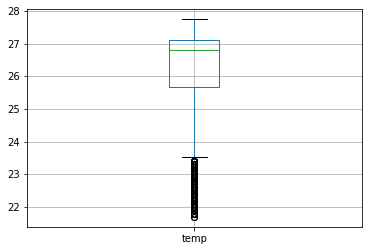

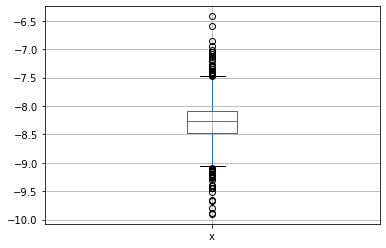

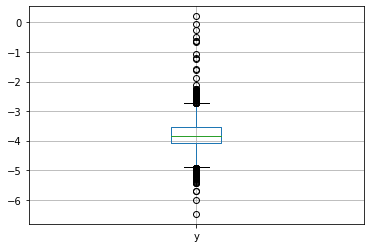

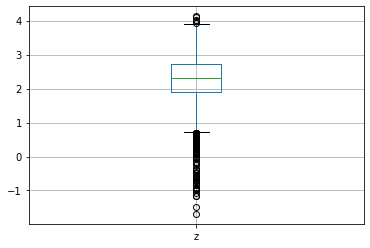

<Figure size 432x288 with 0 Axes>

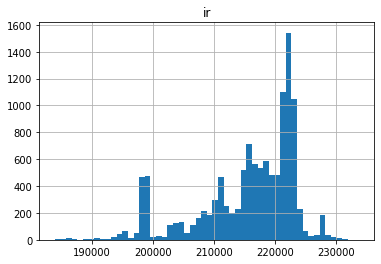

<Figure size 432x288 with 0 Axes>

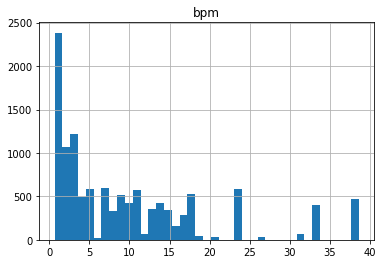

<Figure size 432x288 with 0 Axes>

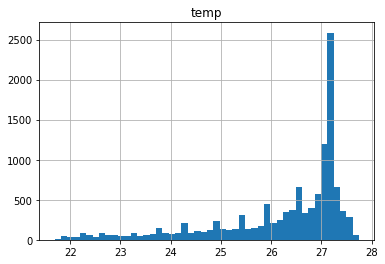

<Figure size 432x288 with 0 Axes>

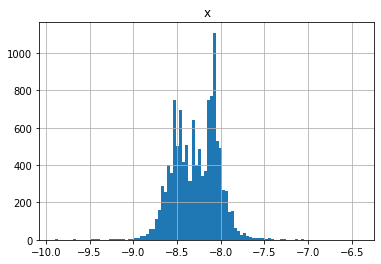

<Figure size 432x288 with 0 Axes>

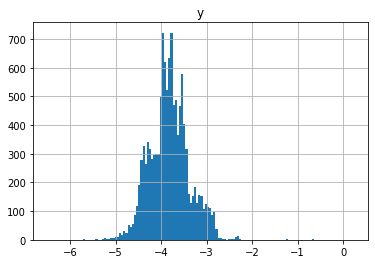

<Figure size 432x288 with 0 Axes>

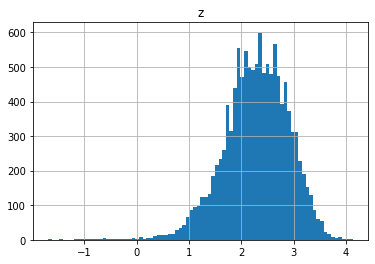

In [161]:
############################
## Descriptive Statistics ##
############################

## Divide into continuous and categorical
continuous_cols = data[["ir", "bpm", "temp", "x", "y", "z"]]
categorical_cols = data[["pump_on", "vacuum_on"]]
categorical_cols = categorical_cols.replace({0.0: "off", 1.0: "on"})

## Continuous column stat
num_nan_cont = continuous_cols.isna().sum()
descriptive_stats_cont = continuous_cols.describe()
kurt = continuous_cols.kurtosis()
skew = continuous_cols.skew()


for column in continuous_cols:
    figure = plt.figure()
    boxplot = continuous_cols[[column]].boxplot()
    figure.savefig("plots/" + PARTICIPANT + "_boxplot_" + column + ".svg", format="svg")

for column in continuous_cols:
    ##Freedman-Diaconis Bin Size
    q25 = continuous_cols[column].quantile(0.25)
    q75 = continuous_cols[column].quantile(0.75)
    max = continuous_cols[column].max()
    min = continuous_cols[column].min()
    num = len(continuous_cols)
    bin_width = (2*(q75 - q25)) /(num**(1/3))
    num_bins = math.ceil((max - min) / bin_width)
    figure = plt.figure()
    hist = continuous_cols[[column]].hist(bins=num_bins)
    figure.savefig("plots/" + PARTICIPANT + "_hist_" + column + ".svg", format="svg")

## Categorical column stats
num_nan_cat = categorical_cols.isna().sum()
descriptive_stats_cat = categorical_cols.describe()
value_counts  = categorical_cols.value_counts()
# add count for number of vacuum on events
# add count for number of pump on events
# add percentage of time pump on
# add percentage of time vacuum on
# maybe extract lengths of pump time on and off

## plots for categorical


## there's a df.bivariate analysis function, do it for each of the columns pairwise
## repeat for categorical with it's specific stats


## remove outliers shown on boxplots

## export all of this to a .txt file as a report (pX_report.txt)

In [145]:
#######################
## Train Test Splits ##
#######################


In [ ]:
#################
## Data Mining ##
#################